## Resolución parcial domiciliario, Computación 3 INSPT, camada '23

Una persona de 70 kg salta a un pozo que atraviesa la tierra de extremo a extremo, comienza a caer pero su pero no es constante ya que la atracción de la tierra se vá modificando a medida que se introduce en la tierra.
la aceleración de la gravedad se puede calcular como

$g(r) = \frac{G M_t r}{R^{3}}$

siendo $r$ la coordenada de posicion medida respecto al centro de la tierra.

$R_t = 6371 km$

$M_t = 5.972 \times 10 ^{24} kg$

$G= 6.674\times 10 ^{-11} \frac{Nm^2}{kg^2}$ 

Realizar una simulación donde se grafique posición en funcion del tiempo para esta caída, determinar cuanto tiempo tarda en llegar al otro extremo de la tierra.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Parámetros
R = 6371e3
G = 6.67e-11
M = 5.973e24
m = 70

In [3]:
#acelereación de la gravedad
def a_gravedad(r):
    return (G*M*r)/(R**3)

#energía potencial gravitatoria
def E_potencial(r):
    return m * a_gravedad(r) * r

#energía cinética
def E_cinetica(v):
    return 0.5 * m * v**2

Text(0, 0.5, 'Energías')

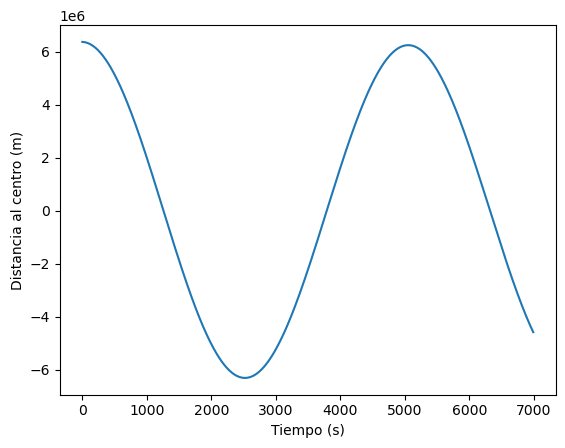

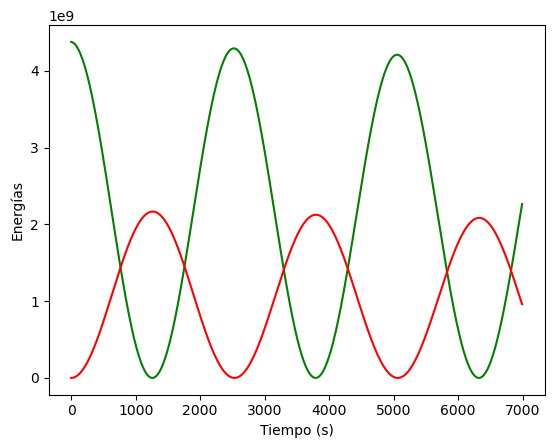

In [4]:
#Variables

# Tiempo
dt = 10
t = np.arange(0,7000,dt) #quiero ver como se comporta en el tiempo 

#Posición en funcion del tiempo
r = np.zeros(len(t))
r[0] = R

#Velocidad en funcion del tiempo
v = np.zeros(len(t))
v[0] = 0

#Aceleración de la gravedad
g = np.zeros(len(t))
g[0] = a_gravedad(r[0])

#Energia Potencial
E_p = np.zeros(len(t))
E_p[0] = E_potencial(r[0])

#Energia Cinetica
E_c = np.zeros(len(t))
E_c[0] = E_cinetica(v[0])

# iterador
i = 1 


while i < len(t):
    g[i] = - a_gravedad(r[i-1])
    v[i] = v[i-1] + g[i]*dt
    r[i] = r[i-1] + v[i] * dt  + 0.5 * g[i] *dt**2
    
    E_c[i] = E_cinetica(v[i])
    E_p[i] = E_potencial(r[i])

    i += 1

plt.figure(1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia al centro (m)')
plt.plot(t,r)   
plt.figure(2)

plt.plot(t,E_p, color='green')
plt.plot(t,E_c, color='red')

plt.xlabel('Tiempo (s)')
plt.ylabel('Energías')


In [5]:
print(np.min(r)) # nunca llega al otro lado exactamente.... 

# para sacar el tiempo que tardo en llegar a ese punto, primero necesito saber el indice del vector
index = np.where(r == np.min(r))
# y ahi lo guardo en una variable
tiempo = str(t[index]/60)

print('El hombre tardó en llegar <<casi>> al otro lado en '+ str(tiempo) +' minutos.')

-6309674.1172399605
El hombre tardó en llegar <<casi>> al otro lado en [42.] minutos.
